In [17]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt

__Проверьте утверждение, что «Доход у мужчин больше, чем у женщин» с уровнем
значимости 5%.__

In [18]:
df = pd.read_csv("Mall_Customers.csv")
#  Оставим только нужные нам колонки и строки без пропусков

#  Разделим доходы по полу
income_male = df[df["Genre"] == "Male"]["Annual Income (k$)"]
income_female = df[df["Genre"] == "Female"]["Annual Income (k$)"]

Z-статистика — это универсальная мера отклонения от нулевой гипотезы в единицах стандартного отклонения

In [19]:
# Выборочные дисперсии считаем известными
sigma1_sq = np.var(income_male, ddof=0)    # ddof=0 генеральная дисперсия
sigma2_sq = np.var(income_female, ddof=0)

n1 = len(income_male)
n2 = len(income_female)

mean1 = np.mean(income_male)
mean2 = np.mean(income_female)

# Z-статистика для двух независимых выборок с известными дисперсиями
Z = (mean1 - mean2) / np.sqrt(sigma1_sq/n1 + sigma2_sq/n2)

# p-value (односторонний тест mu_male > mu_female)
p_value_z = 1 - norm.cdf(Z)

print("дисперсии известны")
print("Z-статистика:", Z)
print("p-value:", p_value_z)

alpha = 0.05


дисперсии известны
Z-статистика: 0.7968669965475619
p-value: 0.21276414009299938


In [20]:
# Выборочные дисперсии (ddof=1 — несмещённая оценка)
var_male = np.var(income_male, ddof=1)
var_female = np.var(income_female, ddof=1)

print("Выборочная дисперсия дохода мужчин:", var_male)
print("Выборочная дисперсия дохода женщин:", var_female)

Выборочная дисперсия дохода мужчин: 709.6029258098224
Выборочная дисперсия дохода женщин: 676.6216216216217


F-критерий чувствителен к отклонениям от нормальности, поэтому на практике часто используют критерий Левена

Чтобы проверить равенство дисперсий
Сначала заменяем данные в каждой группе на расстояния до некоторой центральной точки группы.
Потом сравнивает средние этих расстояний.

In [21]:
# Критерий Левена на равенство дисперсий
levene_stat, levene_p = stats.levene(income_male, income_female, center='mean')

print("Статистика Левена:", levene_stat)
print("p-value Левена:", levene_p)

alpha = 0.05

if levene_p < alpha:
    print("дисперсии различаются.")
    equal_var = False  # будем использовать Welch t-test
else:
    print("дисперсии можно считать равными")
    equal_var = True   # будем использовать pooled t-test


Статистика Левена: 0.010602046928073912
p-value Левена: 0.9180939738175605
дисперсии можно считать равными


In [22]:
s1_sq = np.var(income_male, ddof=1)   
s2_sq = np.var(income_female, ddof=1)
F = s1_sq / s2_sq
df1 = n1 - 1
df2 = n2 - 1
a = stats.f.cdf(F, df1, df2)
p_right = 1 - stats.f.cdf(F, df1, df2)

print("F-статистика:", F)
print("df1, df2:", df1, df2)

# Двусторонний p-value:
# p = 2 * min( P(F' >= F), P(F' <= 1/F) )
p_right = 1 - stats.f.cdf(F, df1, df2)  # вероятность уйти вправо
p_value_F = 2 * p_right                 # двусторонний тест

print("p-value F-теста:", p_value_F)


F-статистика: 1.0487440884746726
df1, df2: 87 111
p-value F-теста: 0.8081292720860467


equal_var пердполагаются ли дисперсии равными?

Если тест Левена показал, что дисперсии равны equal_var=True используем классический t-тест Стьюдента

Если тест Левена показал, что дисперсии не равны equal_var=False используем t-тест Уэлча

In [24]:
mean_male = np.mean(income_male)
mean_female = np.mean(income_female)
print("Средний доход мужчин:", mean_male)
print("Средний доход женщин:", mean_female)

# Двухвыборочный t-тест
t_stat, p_two_sided = stats.ttest_ind(income_male, income_female, equal_var=equal_var, alternative= "greater")

print("t-статистика:", t_stat)
print("Двусторонний p-value:", p_two_sided)

alpha = 0.05

if p_two_sided < alpha:
    print("p < 0.05  отвергаем H0. Доход мужчин статистически значимо выше дохода женщин.")
else:
    print("p >= 0.05 принимаем Н0.")
    print("Нельзя утверждать, что доход мужчин выше дохода женщин на уровне значимости 5%.")


Средний доход мужчин: 62.22727272727273
Средний доход женщин: 59.25
t-статистика: 0.795022298602198
Двусторонний p-value: 0.21377624699963932
p >= 0.05 принимаем Н0.
Нельзя утверждать, что доход мужчин выше дохода женщин на уровне значимости 5%.


__3 Проверьте гипотезу, что неоднородность возрастов женщин такая же как у мужчин, т. е. что
дисперсии возраста женщин равна дисперсии возраста мужчин.__

нулевая гипотеза: дисперсии равны. конкурирующая не равны

In [ ]:
df = pd.read_csv("Mall_Customers.csv")
df_age = df[["Genre", "Age"]].dropna()

age_male = df_age[df_age["Genre"] == "Male"]["Age"]
age_female = df_age[df_age["Genre"] == "Female"]["Age"]

print("Число мужчин:", len(age_male))
print("Число женщин:", len(age_female))

print("Средний возраст мужчин:", np.mean(age_male))
print("Средний возраст женщин:", np.mean(age_female))

print("Выборочная дисперсия возраста мужчин :", np.var(age_male, ddof=1))
print("Выборочная дисперсия возраста женщин :", np.var(age_female, ddof=1))

Число мужчин: 88
Число женщин: 112
Средний возраст мужчин: 39.80681818181818
Средний возраст женщин: 38.098214285714285
Выборочная дисперсия возраста мужчин : 240.70937826541277
Выборочная дисперсия возраста женщин : 159.87314993564996


In [ ]:
levene_stat_age, levene_p_age = stats.levene(age_male, age_female, center='mean'      # тип "центра", вокруг которого считаем отклонения
)

print("Статистика Левена (возраст):", levene_stat_age)
print("p-value Левена (возраст):", levene_p_age)

alpha = 0.05
if levene_p_age < alpha:
    print("p < 0.05 → отвергаем H0: дисперсии возраста различаются.")
else:
    print("p >= 0.05 → нет оснований отвергнуть H0: дисперсии возраста можно считать равными.")


Статистика Левена (возраст): 5.340328044760216
p-value Левена (возраст): 0.021867224315791113
p < 0.05 → отвергаем H0: дисперсии возраста различаются.


levene_stat_age — это число, которое является фактическим значением статистики критерия Левена для данных

проверим критерием Фишера

stats.f.cdf(x, dfnum, dfden)
x — значение F-статистики, которое мы получили.
dfnum — число степеней свободы в числителе (df1).
dfden — число степеней свободы в знаменателе (df2).
Мы берём 1 - cdf, чтобы получить хвост справа.

In [ ]:
# Выборочные несмещённые дисперсии
s1_sq = np.var(age_male, ddof=1)
s2_sq = np.var(age_female, ddof=1)

n1 = len(age_male)
n2 = len(age_female)

# F-статистика
if s1_sq >= s2_sq:
    F = s1_sq / s2_sq
    df1 = n1 - 1
    df2 = n2 - 1
else:
    F = s2_sq / s1_sq
    df1 = n2 - 1
    df2 = n1 - 1

print("F-статистика:", F)
print("df1, df2:", df1, df2)

# Двусторонний p-value:
# p = 2 * min( P(F' >= F), P(F' <= 1/F) )
p_right = 1 - stats.f.cdf(F, df1, df2)  # вероятность уйти вправо
p_value_F = 2 * p_right                 # двусторонний тест

print("p-value F-теста:", p_value_F)

alpha = 0.05
if p_value_F < alpha:
    print("p < 0.05 отвергаем H0: дисперсии возраста различаются .")
else:
    print("p >= 0.05 нет оснований отвергнуть H0 .")


F-статистика: 1.5056272949041158
df1, df2: 87 111
p-value F-теста: 0.041995474348862416
p < 0.05 отвергаем H0: дисперсии возраста различаются .


In [ ]:
# Основные модули:

# statsmodels.stats.weightstats
# Тесты для средних:

# z-тесты (известная дисперсия / большие выборки)

# t-тесты (неизвестная дисперсия, равная / неравная)

# работа через объекты DescrStatsW, CompareMeans

# statsmodels.stats.proportion
# Тесты для долей/пропорций:

# z-тесты для 1 и 2 пропорций

# доверительные интервалы для долей

# statsmodels.stats.anova
# ANOVA (дисперсионный анализ) — сравнение нескольких средних (1-факторная, 2-факторная и т.д., через модели).

# statsmodels.stats.diagnostic
# Разные тесты на:

# гетероскедастичность (разные дисперсии остатков),

# автокорреляцию,

# нормальность остатков и т.п.
# Это тоже параметрические гипотезы, но уже в контексте регрессии.

In [ ]:

N_blades = 100      # N - число лопаток
lam = 2.0           # λ - интенсивность экспоненциального распределения


n_engines = 5000    # сколько двигателей мы смоделируем


# np.random.exponential(scale, size)
# scale = 1/λ  (в экспоненциальном распределении в NumPy параметр - это именно scale)
# size = (n_engines, N_blades) матрица: каждая строка = один двигатель, 100 столбцов = лопатки
ti = np.random.exponential(scale=1/lam, size=(n_engines, N_blades))

# axis=1  суммируем по строке: получаем вектор длины n_engines
T = ti.sum(axis=1)

print("Размер полученной выборки T:", len(T))
print("Первые 10 значений T:", T[:10])

Размер полученной выборки T: 5000
Первые 10 значений T: [47.82472326 49.30781067 49.61685009 47.91883298 50.24991218 47.77723334
 53.05859771 46.1062881  44.2580018  42.68009089]


Сначала просто посчитаем выборочное среднее и дисперсию:

2) Вычислите параметры предполагаемого закона распределения T и сравните их с
теоретическими.

In [ ]:
# Выборочное среднее и дисперсия T (ddof=1 - несмещённая оценка дисперсии)
mean_T = np.mean(T)
var_T = np.var(T, ddof=1)

print("Выборочное среднее T:", mean_T)
print("Выборочная дисперсия T:", var_T)

# Теоретические значения
theor_mean_T = N_blades / lam
theor_var_T = N_blades / (lam ** 2)

print("Теоретическое среднее T:", theor_mean_T)
print("Теоретическая дисперсия T:", theor_var_T)


Выборочное среднее T: 50.10255388052409
Выборочная дисперсия T: 25.419851880252278
Теоретическое среднее T: 50.0
Теоретическая дисперсия T: 25.0


Оценка параметров гамма-распределения по выборке

In [ ]:
# Оценка параметров k и theta по методу моментов
k_hat = mean_T ** 2 / var_T
theta_hat = var_T / mean_T

print("Оценка k (shape):", k_hat)
print("Оценка theta (scale):", theta_hat)

print("Теоретическое k:", N_blades)
print("Теоретическое theta:", 1/lam)


Оценка k (shape): 98.75218459872106
Оценка theta (scale): 0.5073564102314854
Теоретическое k: 100
Теоретическое theta: 0.5


3) Постройте гистограммы относительных частот и эмпирическую функцию распределения
для T.

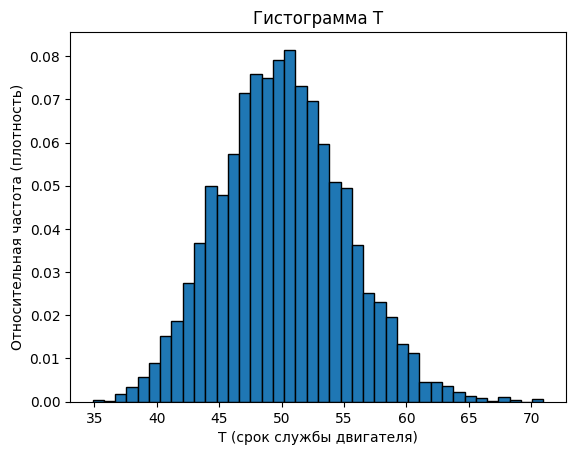

In [ ]:
plt.figure()
# density=True -> строим относительные частоты, площадь под гистограммой ≈ 1
plt.hist(T, bins=40, density=True, edgecolor='black')
plt.xlabel("T (срок службы двигателя)")
plt.ylabel("Относительная частота (плотность)")
plt.title("Гистограмма T")
plt.show()


T_sorted — значения по оси X (упорядоченная выборка)
F_emp — значения по оси Y (1/n, 2/n, …)
where='post' означает, что “ступенька” начинается после точки
(то есть классическая форма ЭФР)

stats.gamma.cdf(x, a, loc, scale)
где:
x — точки, в которых считаем CDF
→ мы подставляем именно T_sorted, чтобы потом красиво сравнить
a — параметр shape
→ для гаммы a = k = N_blades = 100
loc = 0 — сдвиг
→ гамма начинается с нуля, поэтому сдвиг 0
scale = 1/lam — параметр масштаба θ
→ θ = 1/λ = 0.5

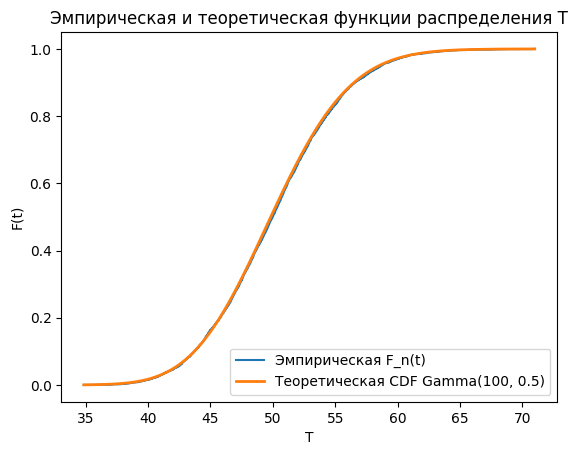

In [ ]:
# Строим эмпирическую функцию распределения
T_sorted = np.sort(T)
n = len(T_sorted)
F_emp = np.arange(1, n+1) / n  # 1/n, 2/n, ..., n/n

plt.figure()
plt.step(T_sorted, F_emp, where='post', label="Эмпирическая F_n(t)")

# Теоретическая CDF гамма-распределения
gamma_cdf = stats.gamma.cdf(T_sorted, a=N_blades, loc=0, scale=1/lam)
plt.plot(T_sorted, gamma_cdf, label="Теоретическая CDF Gamma(100, 0.5)", linewidth=2)

plt.xlabel("T")
plt.ylabel("F(t)")
plt.title("Эмпирическая и теоретическая функции распределения T")
plt.legend()
plt.show()


In [ ]:
# Критерий Колмогорова–Смирнова для проверки H0: T ~ Gamma(100, 0.5)

ks_stat, ks_pvalue = stats.kstest(
    T,                # rvs: наша выборка T
    'gamma',          # cdf: имя распределения из scipy.stats
    args=(N_blades,   # a = shape = k = 100
          0,          # loc = 0 (сдвига нет)
          1/lam)      # scale = θ = 1/λ = 0.5
)

print("K-S статистика:", ks_stat)
print("K-S p-value:", ks_pvalue)

alpha = 0.05
if ks_pvalue < alpha:
    print("p < 0.05  отвергаем H0: распределение T не похоже на Gamma(100, 0.5).")
else:
    print("p ≥ 0.05  принимаем H0: данные согласуются с Gamma(100, 0.5).")


K-S статистика: 0.013851422460715135
K-S p-value: 0.29002659219332316
p ≥ 0.05  принимаем H0: данные согласуются с Gamma(100, 0.5).


In [ ]:
# ШАГ 1: оценки параметров k и θ по выборке (метод моментов)
mean_T = np.mean(T)
var_T = np.var(T, ddof=1)   # несмещённая дисперсия

k_hat = mean_T**2 / var_T
theta_hat = var_T / mean_T

print("Оценка k (shape):", k_hat)
print("Оценка θ (scale):", theta_hat)


Оценка k (shape): 98.75218459872106
Оценка θ (scale): 0.5073564102314854


In [ ]:
# ШАГ 2: разбиваем [min(T), max(T)] на m равных интервалов
m = 10  # число интервалов 

T_min, T_max = T.min(), T.max()
bin_edges = np.linspace(T_min, T_max, m + 1)  # m интервалов m+1 граница

print("Границы интервалов:", bin_edges)

# n_j – количество наблюдений в каждом интервале
n_j, _ = np.histogram(T, bins=bin_edges)

n = len(T)
rel_freq = n_j / n   # относительные частоты n_j/n

print("Абсолютные частоты n_j:", n_j)
print("Относительные частоты n_j/n:", rel_freq)


Границы интервалов: [34.86012773 38.47218497 42.08424222 45.69629947 49.30835672 52.92041396
 56.53247121 60.14452846 63.7565857  67.36864295 70.9807002 ]
Абсолютные частоты n_j: [  26  219  731 1263 1369  886  366  109   21   10]
Относительные частоты n_j/n: [0.0052 0.0438 0.1462 0.2526 0.2738 0.1772 0.0732 0.0218 0.0042 0.002 ]


In [ ]:
# ШАГ 3: считаем теоретические вероятности p_j
F_edges = stats.gamma.cdf(bin_edges, a=k_hat, loc=0, scale=theta_hat)
p_j = np.diff(F_edges)
print(p_j)


[0.0061871  0.0428905  0.14346677 0.25742677 0.26941246 0.1759871
 0.07588029 0.02262951 0.00485612 0.00077555]


In [ ]:
# ШАГ 4: значение выборочной статистики χ²

E_j = n * p_j  # ожидаемые частоты

print("Ожидаемые частоты E_j:", E_j)

# Проверим условие применимости: E_j >= 5
print("Минимальное E_j:", E_j.min())

chi2_stat = np.sum((n_j - E_j)**2 / E_j)
print("χ²-статистика:", chi2_stat)


Ожидаемые частоты E_j: [  30.93552471  214.45248913  717.33384124 1287.13385398 1347.06227856
  879.93547722  379.40142698  113.14756299   24.28059889    3.87773276]
Минимальное E_j: 3.8777327633471304
χ²-статистика: 12.730444054995402


In [ ]:
# ШАГ 5: число степеней свободы
k_params = 2            # k и θ
df = m - k_params - 1   # m - k - 1

print("Число степеней свободы df:", df)

alpha = 0.05

# Критическое значение χ² по квантилю
chi2_crit = stats.chi2.ppf(1 - alpha, df)
print("Критическое значение χ² (уровень 0.05):", chi2_crit)

# p-value: P(χ² >= chi2_stat)
p_value = 1 - stats.chi2.cdf(chi2_stat, df)
print("p-value:", p_value)


Число степеней свободы df: 7
Критическое значение χ² (уровень 0.05): 14.067140449340167
p-value: 0.07895485693446924


In [ ]:
if chi2_stat <= chi2_crit:
    print("χ² =", chi2_stat, "<=", chi2_crit, " принимаем H0.")
else:
    print("χ² =", chi2_stat, ">", chi2_crit, " отвергаем H0.")

print("По p-value:", end=" ")
if p_value < alpha:
    print("p <", alpha, " H0 отвергается.")
else:
    print("p >=", alpha, " принимаем H0.")


χ² = 12.730444054995402 <= 14.067140449340167  принимаем H0.
По p-value: p >= 0.05  принимаем H0.
